In [1]:
## 分析J85和J98在4 DPA, 12 DPA 和20 DPA 的保守率

In [28]:
rm(list=ls())
setwd('F:/Multip_species_3Dgenome/Figure6/Figure 6')
library(ggplot2)
library(ggrepel)
df <- read.csv("cpt_TAD_loop_conserved.txt", sep = '\t')
df <- within(df, tags <- factor(tags, levels = c("compartment", "TAD",  "loop")))
with(df, levels(days))
df <- within(df, days <- factor(days, levels = c("compartment", "TAD",  "loop")))
with(df, levels(days))
head(df)

[1] "12DPA" "20DPA" "4DPA"

[1] "compartment" "TAD"         "loop"

,tags,values,days,species
,<fct>,<dbl>,<fct>,<fct>
1,compartment,92.51,NA,J85
2,TAD,92.48,NA,J85
3,loop,35.65,NA,J85
4,compartment,94.97,NA,J98
5,TAD,94.54,NA,J98
6,loop,47.49,NA,J98


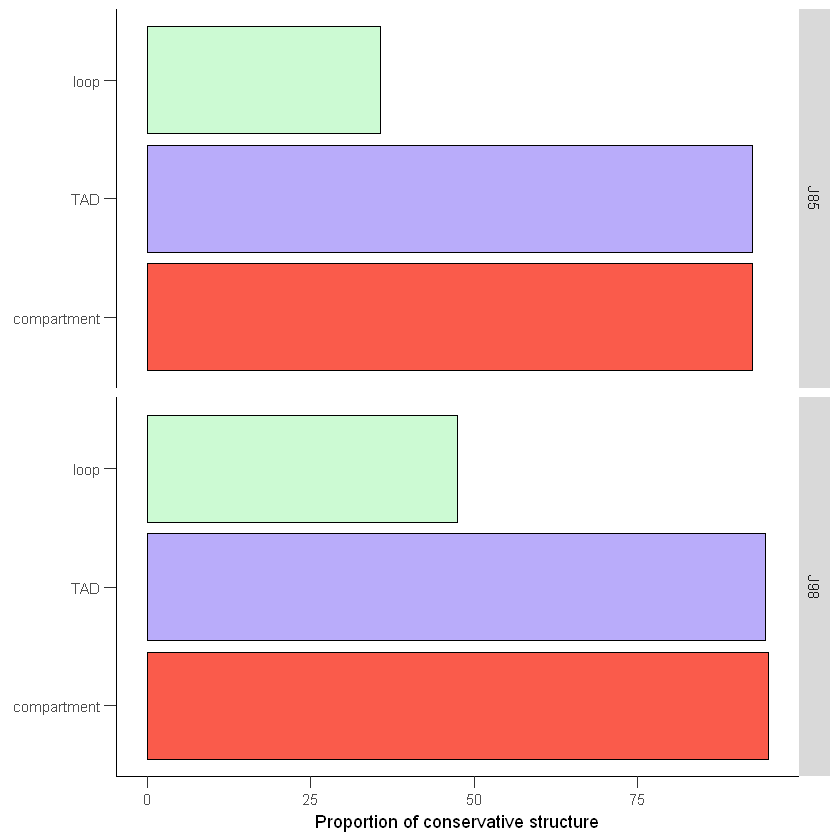

In [52]:
fg <- ggplot(df, aes(x = tags, y = values, fill=tags)) +
geom_bar(stat = "identity", position = "dodge", color = "black")+
labs(x=NULL, y="Proportion of conservative structure", fill=NULL)+
facet_grid(species~.)+
theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.line=element_line(linetype=1,color="black"),
    axis.ticks.length = unit(0.25, "cm"),
    #axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
     )+
scale_fill_manual(values = c("#FA5B4B","#B9ACFA", "#CCFAD3"))+
coord_flip()
fg
ggsave(plot = fg, filename = "cpt_TAD_loop_conserved.pdf", height = 3, width = 4)

In [4]:
##  J85和J98差异3Dgenome 所能够包含的差异表达基因
rm(list=ls())
setwd('F:/Multip_species_3Dgenome/Hi-C/diff_3Dgenome_diff_gene')
library(ggplot2)
df <- read.csv("diff_3Dgenome_diff_gene.txt", sep = '\t')
df <- within(df, tags <- factor(tags, levels = c("loop", "TAD",  "compartment")))
with(df, levels(tags))
df <- within(df, days <- factor(days, levels = c("4DPA", "12DPA",  "20DPA")))
with(df, levels(days))

[1] "loop"        "TAD"         "compartment"

[1] "4DPA"  "12DPA" "20DPA"

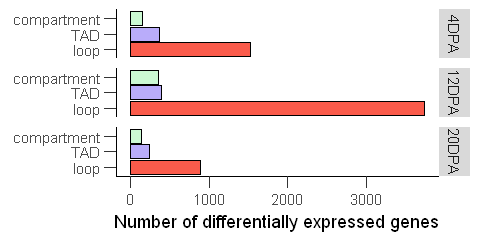

In [6]:
options(repr.plot.width=4,repr.plot.height=2)
fg <- ggplot(df, aes(x = tags, y = values, fill=tags)) +
geom_bar(stat = "identity", position = "dodge", color = "black")+
labs(x=NULL, y="Number of differentially expressed genes", fill=NULL)+
facet_grid(days~.)+
theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.line=element_line(linetype=1,color="black"),
    axis.ticks.length = unit(0.25, "cm"),
    #axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
     )+
scale_fill_manual(values = c("#FA5B4B","#B9ACFA", "#CCFAD3"))+
coord_flip()
fg
ggsave(plot = fg, filename = "diff_3Dgenome_diff_gene.pdf", height = 3, width = 4)

In [14]:
## 统计时期TAD的数量
rm(list=ls())
setwd('F:/Multip_species_3Dgenome/Hi-C/TAD')
library(ggplot2)
library(ggrepel)
library(ggbreak)
df <- read.csv("TAD_number_200K-2M.txt", sep = '\t')
df <- within(df, days <- factor(days, levels = c("4 DPA", "12 DPA",  "20 DPA")))
with(df, levels(days))
head(df)

[1] "4 DPA"  "12 DPA" "20 DPA"

,number,tags,days
,<int>,<fct>,<fct>
1,2539,J85,4 DPA
2,2611,J85,12 DPA
3,2524,J85,20 DPA
4,2510,J98,4 DPA
5,2607,J98,12 DPA
6,2592,J98,20 DPA


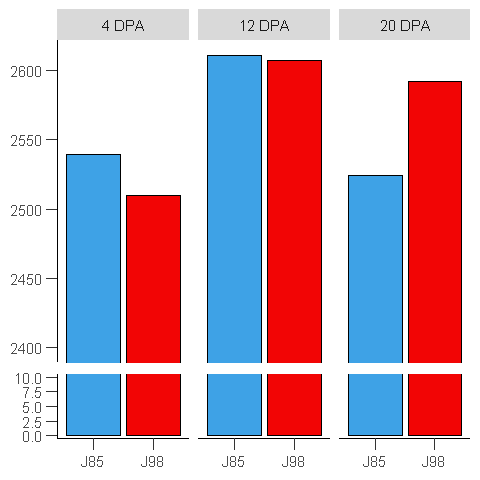

In [31]:
options(repr.plot.width=4,repr.plot.height=4)
fg <- ggplot(df, aes(x = tags, y = number, fill=tags)) +
geom_bar(stat = "identity", position = "dodge", color = "black")+
labs(x=NULL, y=NULL, fill=NULL)+
facet_grid(.~days)+
theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.line=element_line(linetype=1,color="black"),
    axis.ticks.length = unit(0.25, "cm"),
    #axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
     )+
scale_fill_manual(values = c("#3EA2E6", "#F20505"))+
scale_y_break(c(10, 2400), scales = 5)
fg
ggsave(plot = fg, filename = "TAD_number_200K-2M.pdf", height = 3.5, width = 3)

In [12]:
## 分析与基因相关的loop所占比例
rm(list=ls())
setwd('F:/Multip_species_3Dgenome/Hi-C/loop')
library(ggplot2)
library(ggrepel)
library(ggbreak)
df <- read.csv("G_loops_ratio.txt", sep = '\t')
df <- within(df, days <- factor(days, levels = c("20 DPA", "12 DPA",  "4 DPA")))
with(df, levels(days))
head(df)

[1] "20 DPA" "12 DPA" "4 DPA"

,G_loops,GN_loops,All_loops,ratio,GN_ratio,species,days
,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>
1,28270,18172,73003,0.3872444,0.2489213,J85,4 DPA
2,26021,18691,84056,0.3095674,0.2223637,J85,12 DPA
3,11283,8154,39008,0.2892484,0.2090340,J85,20 DPA
4,30499,20247,83255,0.3663324,0.2431926,J98,4 DPA
5,50304,29071,113783,0.4421047,0.2554951,J98,12 DPA
6,22131,13556,47834,0.4626625,0.2833967,J98,20 DPA


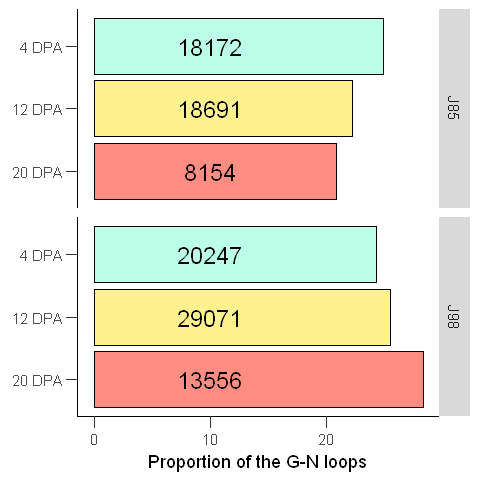

In [16]:
options(repr.plot.width=4,repr.plot.height=4)
fg <- ggplot(df, aes(x = days, y = GN_ratio*100, fill=days)) +
geom_bar(stat = "identity", position = "dodge", color = "black")+
geom_text(aes(label = round(GN_loops, digits = 2), y =10), size=5)+
labs(x=NULL, y="Proportion of the G-N loops", fill=NULL)+
facet_grid(species~.)+
theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.line=element_line(linetype=1,color="black"),
    axis.ticks.length = unit(0.25, "cm"),
   # axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
     )+
scale_fill_manual(values = c("#FF8D82", "#FFF18E", "#BBFFE8"))+
coord_flip()
fg
ggsave(plot = fg, filename = "G_loops_ratio.pdf", height = 3, width = 3.8)

[1] "4 DPA"  "12 DPA" "20 DPA"

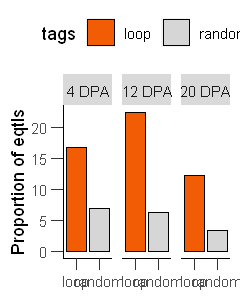

In [94]:
## 分析eqtl与loop overlap 并且与random比较
##比较J85和J98网络中保守的和动态的基因表达量
rm(list = ls())
options(repr.plot.width=2,repr.plot.height=2.5)
setwd('F:/Multip_species_3Dgenome/Hi-C/eqtl_loop/eqtl_loop_overlap')
library(ggplot2)
library(ggpubr)
df <- read.csv('eqtl_loop_overlap.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("4 DPA", "12 DPA", "20 DPA")))
with(df, levels(days))

fg <- ggplot(df, aes(x=tags, y=100*ratio, fill=tags))+
geom_bar(stat = "identity", position = "stack", color = "black")+
labs(x=NULL, y='Proportion of eqtls')+
facet_grid(.~days)+
#coord_cartesian(ylim = c(0, 8)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='top',
     axis.ticks.length = unit(0.25, 'cm')
     )+
scale_fill_manual(values=c("#F25C05",'#D6D6D6'))
fg
ggsave(plot =fg, filename = 'eqtl_loop_overlap.pdf', height =3.5, width = 3)

In [89]:
## 4DPA
a=c(1607, 7976)
#b=c(548, 9583)
b=c(669, 8914)

ab <- data.frame(a, b)
chisq.test(ab)
## 12 DPA
a=c(1581, 5506)
#b=c(331, 6756)
b = c(446,6641)
ab <- data.frame(a, b)
chisq.test(ab)
## 20DPA
a=c(991, 8049)
#b=c(281, 7768)
b=c(269, 7780)
ab <- data.frame(a, b)
chisq.test(ab)


	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 437.73, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 740.28, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 360.92, df = 1, p-value < 2.2e-16


[1] "4 DPA"  "12 DPA" "20 DPA"

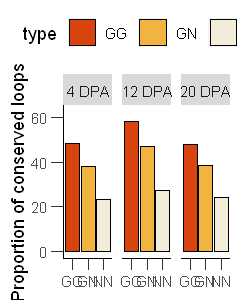

In [7]:
### 不同类型的loop保守程度
rm(list = ls())
options(repr.plot.width=2,repr.plot.height=2.5)
setwd('F:/Multip_species_3Dgenome/Hi-C/conserved_loops')
library(ggplot2)
library(ggpubr)
df <- read.csv('three_type_loop_conserved_ratio.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("4 DPA", "12 DPA", "20 DPA")))
with(df, levels(days))
fg <- ggplot(df, aes(x=type, y=100*ratio, fill=type))+
geom_bar(stat = "identity", position = "stack", color = "black")+
labs(x=NULL, y='Proportion of conserved loops')+
facet_grid(.~days)+
coord_cartesian(ylim = c(0, 62)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='top',
     axis.ticks.length = unit(0.25, 'cm')
     )+
scale_fill_manual(values=c("#D9430D",'#F2B441','#F2ECD8'))
fg
ggsave(plot =fg, filename = 'three_type_loop_conserved_ratio.pdf', height =3.5, width = 3)

In [6]:
## 分析这个保守loop是否具有显著差异，用卡方检验
## 4DPA 
a = c(9786, 10564)
b = c(14620, 23799)
c = c(22418, 75069)
ab = data.frame(a, b)
bc = data.frame(b, c)
chisq.test(ab) #GG-GN
chisq.test(bc)#GN-NN

## 12DPA
a = c(15612, 12951)
b = c(22299, 25463)
c = c(33153,88359)
ab = data.frame(a, b)
bc = data.frame(b, c)
chisq.test(ab) #GG-GN
chisq.test(bc)#GN-NN

#20 DPA
a = c(5061, 11704)
b = c(8255,21710)
c = c(12973,40453)
ab = data.frame(a, b)
bc = data.frame(b, c)
chisq.test(ab) #GG-GN
chisq.test(bc)#GN-NN


	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 551.22, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  bc
X-squared = 3151.2, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 453.89, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  bc
X-squared = 5859.6, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab
X-squared = 36.617, df = 1, p-value = 1.438e-09



	Pearson's Chi-squared test with Yates' continuity correction

data:  bc
X-squared = 107.78, df = 1, p-value < 2.2e-16


[1] "4 DPA"  "12 DPA" "20 DPA"

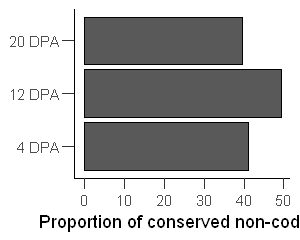

In [16]:
### 保守的非调控区域的变化情况
rm(list = ls())
options(repr.plot.width=2.5,repr.plot.height=2)
setwd('F:/Multip_species_3Dgenome/Hi-C/conserved_regions')
library(ggplot2)
library(ggpubr)
df <- read.csv('conserved_noncoding_ratio.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("4 DPA", "12 DPA", "20 DPA")))
with(df, levels(days))

fg <- ggplot(df, aes(x=days, y=100*ratio))+
geom_bar(stat = "identity", position = "stack", color = "black")+
labs(x=NULL, y='Proportion of conserved non-coding')+
#facet_grid(.~days)+
#coord_cartesian(ylim = c(0, 62)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='top',
     axis.ticks.length = unit(0.25, 'cm')
     )+
coord_flip()
#scale_fill_manual(values=c("#D9430D",'#F2B441','#F2ECD8'))
fg
ggsave(plot =fg, filename = 'conserved_noncoding_ratio.pdf', height =2, width = 2.8)

[1] "10DPA_20DPA" "5DPA_10DPA"  "0DPA_5DPA"

,ratio,days,tags
,<dbl>,<fct>,<chr>
1,0.2855664,0DPA_5DPA,dynamic
2,0.2839937,10DPA_20DPA,dynamic
3,0.2423237,5DPA_10DPA,dynamic
4,0.7144336,0DPA_5DPA,stable
5,0.7160063,10DPA_20DPA,stable
6,0.7576763,5DPA_10DPA,stable


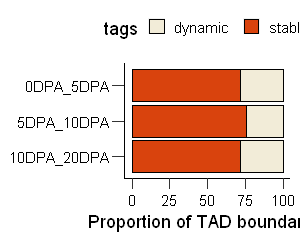

In [17]:
## 分析TAD boundary 动态变化
rm(list = ls())
options(repr.plot.width=2.5,repr.plot.height=2)
setwd('F:/fiber/airticle/GB_modification/TADCompare')
library(ggplot2)
library(ggpubr)
df <- read.csv('dynamic_species_boundary_ratio.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("10DPA_20DPA", "5DPA_10DPA", "0DPA_5DPA")))
with(df, levels(days))
head(df)
fg <- ggplot(df, aes(x=days, y=100*ratio, fill=tags))+
geom_bar(stat = "identity", position = "stack", color = "black")+
labs(x=NULL, y='Proportion of TAD boundaries')+
#facet_grid(.~days)+
#coord_cartesian(ylim = c(0, 62)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='top',
     axis.ticks.length = unit(0.25, 'cm'),
     legend.key.size = unit(10, 'pt'),
     axis.text = element_text(color = "black")
     )+
coord_flip()+
scale_fill_manual(values=c('#F2ECD8', "#D9430D"))
fg
ggsave(plot =fg, filename = 'dynamic_species_boundary_ratio.pdf', height =2, width = 2.8)